# Floating_Population_2004.csv에 대한 EDA

# 문제 정의 : 2004년 서울시 유동인구 분석

## DataSet 구성

1. 일자 : 유동 인구를 수집한 날짜( 2020/04/01 ~ 2020/04/30 )
2. 시간 : 유동 인구를 수집한 시간( 0시 ~ 23시, 1시간 단위 수집 )
3. 연령대 : 유동 인구를 수집한 연령대( 20대 ~ 70대 )
4. 시 : 유동 인구를 수집한 시( 서울시 )
5. 구 : 유동 인구를 수집한 구( 서울 25개구 )
6. 유동인구수

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# matplotlib 한글 폰트 오류 문제 해결 - windows
#from matplotlib import font_manager, rc
#font_path = "C:\\Windows\\Fonts\\malgun.ttf" # 폰트 파일 위치
#font_name = font_manager.FontProperties( fname = font_path ).get_name()
#rc( 'font', family = font_name )

# matplotlib 한글 폰트 오류 문제 해결 - mac 
from matplotlib import rc
rc( 'font', family = 'AppleGothic' )

# IPython 디스플레이 설정 변경 - 출력할 최대 열의 개수
pd.set_option( 'display.max_columns', 20 ) # 출력할 열의 개수 한도
pd.set_option( 'display.max_colwidth', 20 ) # 출력할 열의 너비
pd.set_option( 'display.unicode.east_asian_width', True ) # 유니코드 사용 너비 조정

import warnings
warnings.filterwarnings('ignore')

In [96]:
from google.colab import drive
drive.mount( '/content/drive' )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터 수집

- DataFrame 생성
- DataFrame 기본 정보 확인

In [124]:
df = pd.read_csv( '/content/drive/MyDrive/Colab Notebooks/202104AI_B_Workspace/Floating_Population_2004.csv', 
                  encoding = 'utf-8' )

In [125]:
df.head()

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
0,20200401,0,20,남성,서울,도봉구,21490
1,20200401,0,30,여성,서울,동대문구,27260
2,20200401,0,50,남성,서울,구로구,35670
3,20200401,1,30,여성,서울,강남구,52380
4,20200401,1,40,남성,서울,동대문구,28420


In [126]:
df.tail()

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
215995,20200430,22,40,여성,서울,성동구,22150
215996,20200430,22,50,여성,서울,서대문구,23270
215997,20200430,23,20,여성,서울,용산구,18570
215998,20200430,23,30,여성,서울,서대문구,21100
215999,20200430,23,40,남성,서울,강남구,45730


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216000 entries, 0 to 215999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   일자          216000 non-null  int64 
 1   시간(1시간단위)   216000 non-null  int64 
 2   연령대(10세단위)  216000 non-null  int64 
 3   성별          216000 non-null  object
 4   시           216000 non-null  object
 5   군구          216000 non-null  object
 6   유동인구수       216000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 11.5+ MB


In [128]:
df.shape

(216000, 7)

In [129]:
df.dtypes

일자                 int64
시간(1시간단위)      int64
연령대(10세단위)     int64
성별                object
시                  object
군구                object
유동인구수           int64
dtype: object

## 데이터 전처리

### 불필요한 변수 삭제 - 서울시 데이터이므로 '시' 변수 삭제

In [130]:
df.drop( '시', axis = 1, inplace = True )

In [131]:
df.head()

,일자,시간(1시간단위),연령대(10세단위),성별,군구,유동인구수
0,20200401,0,20,남성,도봉구,21490
1,20200401,0,30,여성,동대문구,27260
2,20200401,0,50,남성,구로구,35670
3,20200401,1,30,여성,강남구,52380
4,20200401,1,40,남성,동대문구,28420


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216000 entries, 0 to 215999
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   일자          216000 non-null  int64 
 1   시간(1시간단위)   216000 non-null  int64 
 2   연령대(10세단위)  216000 non-null  int64 
 3   성별          216000 non-null  object
 4   군구          216000 non-null  object
 5   유동인구수       216000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 9.9+ MB


### 변수 이름 변경

In [133]:
df.rename( columns = { '시간(1시간단위)': '단위시간', 
                       '연령대(10세단위)': '연령대',
                       '군구': '구' }, inplace = True )
df.head()

,일자,단위시간,연령대,성별,구,유동인구수
0,20200401,0,20,남성,도봉구,21490
1,20200401,0,30,여성,동대문구,27260
2,20200401,0,50,남성,구로구,35670
3,20200401,1,30,여성,강남구,52380
4,20200401,1,40,남성,동대문구,28420


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216000 entries, 0 to 215999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   일자      216000 non-null  int64 
 1   단위시간    216000 non-null  int64 
 2   연령대     216000 non-null  int64 
 3   성별      216000 non-null  object
 4   구       216000 non-null  object
 5   유동인구수   216000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 9.9+ MB


### 타입 변환

#### 범주형 타입으로 변환

In [135]:
df[ '단위시간' ] = df[ '단위시간' ].astype( 'category' )
df[ '연령대' ] = df[ '연령대' ].astype( 'category' )
df[ '성별' ] = df[ '성별' ].astype( 'category' )
df[ '구' ] = df[ '구' ].astype( 'category' )

In [136]:
df[ '단위시간' ].head()

0    0
1    0
2    0
3    1
4    1
Name: 단위시간, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [137]:
df[ '성별' ].head()

0    남성
1    여성
2    남성
3    여성
4    남성
Name: 성별, dtype: category
Categories (2, object): ['남성', '여성']

In [138]:
df[ '연령대' ].head()

0    20
1    30
2    50
3    30
4    40
Name: 연령대, dtype: category
Categories (6, int64): [20, 30, 40, 50, 60, 70]

In [139]:
df[ '구' ].head()

0      도봉구
1    동대문구
2      구로구
3      강남구
4    동대문구
Name: 구, dtype: category
Categories (25, object): ['강남구', '강동구', '강북구', '강서구', ..., '은평구', '종로구', '중구', '중랑구']

#### 정수형인 일자를 문자형으로 변환

In [140]:
df[ '일자' ] = df[ '일자' ].astype( 'str' )
df.dtypes

일자            object
단위시간      category
연령대        category
성별          category
구            category
유동인구수       int64
dtype: object

### 결측치 확인

In [141]:
df.isnull().sum( axis = 0 )

일자          0
단위시간      0
연령대        0
성별          0
구            0
유동인구수    0
dtype: int64

### 이상치 확인

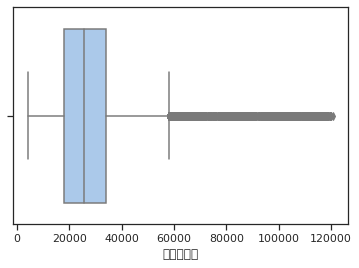

In [142]:
sns.set_theme( style = 'ticks', palette = 'pastel' )

sns.boxplot( x = df[ '유동인구수' ] )

- 이상치에 대한 처리가 의미없음

## EDA

###  조사기간

In [143]:
date_list = list( df.일자.unique() )
for v in date_list:
    print( f'{v}\t' )
print( f'\n조사 기간 : 총{len( date_list)}일' )

20200401	
20200402	
20200403	
20200404	
20200405	
20200406	
20200407	
20200408	
20200409	
20200410	
20200411	
20200412	
20200413	
20200414	
20200415	
20200416	
20200417	
20200418	
20200419	
20200420	
20200421	
20200422	
20200423	
20200424	
20200425	
20200426	
20200427	
20200428	
20200429	
20200430	

조사 기간 : 총30일


### 조사 시간대

In [144]:
time_list = list( df.단위시간.unique() )
time_list = sorted( time_list )
for v in time_list:
    print( f'{v}\t' )
print( f'\n조사 시간 : 총{len( time_list )}시간' )

0	
1	
2	
3	
4	
5	
6	
7	
8	
9	
10	
11	
12	
13	
14	
15	
16	
17	
18	
19	
20	
21	
22	
23	

조사 시간 : 총24시간


### 조사 성별

In [145]:
gender_list = list( df.성별.unique() )
for v in gender_list:
    print( f'{v}\t' )
print( f'\n조사 성별 : {len( gender_list )}' )

남성	
여성	

조사 성별 : 2


### 조사 연령

In [146]:
age_list = list( df.연령대.unique() )
for v in age_list:
    print( f'{v}\t' )
print( f'\n조사 연령대 : {len( age_list )}' )

20	
30	
50	
40	
70	
60	

조사 연령대 : 6


### 조사 구

In [147]:
gu_list = list( df.구.unique() )
for v in gu_list:
    print( f'{v}\t' )
print( f'\n조사 구 : 총{len( gu_list )}개구' )

도봉구	
동대문구	
구로구	
강남구	
성동구	
강서구	
금천구	
관악구	
중랑구	
강북구	
종로구	
영등포구	
용산구	
광진구	
노원구	
양천구	
중구	
마포구	
동작구	
서대문구	
송파구	
은평구	
강동구	
서초구	
성북구	

조사 구 : 총25개구


### EDA를 위한 사용자 정의 함수

In [148]:
#********************************
# 특정 변수 내용에 대한 집계함수
#
# 인수 : list, 변수
# return : Series 객체
#********************************
def func_aggregate( l, v ):
    population = []
    for i in range( len( l ) ):
        mask = l[ i ] == v
        result = df.loc[ mask ]
        population.append( result.유동인구수.sum() )

    s = pd.Series( population, index = l )
    
    return s

## 유동인구 요약 통계

In [149]:
df.describe().round( 2 )

,유동인구수
count,216000.00
mean,27267.77
std,12480.43
min,4380.00
25%,18070.00
50%,25470.00
75%,34090.00
max,120640.00


### 2004년 4월 서울시 평균 유동 인구수

In [150]:
print( f'2004년 4월 서울시 평균 유동 인구수 : {round( df.유동인구수.mean(), 2 )}명' )

2004년 4월 서울시 평균 유동 인구수 : 27267.77명


### 2004년 4월중 가장 유동 인구수가 많은 날

In [151]:
date_s = func_aggregate( date_list, df.일자 )
daily_max = date_s.max()
date = date_s.index[ date_s.argmax() ]
print( f'[ {date[ :4 ]}/{date[ 4:6 ]}/{date[ 6: ]} ] 총 유동인구는 : {daily_max:8d}명' )

[ 2020/04/01 ] 총 유동인구는 : 200208500명


### 2004년 4월 서울시 일 최대 유동 날짜, 지역, 유동 인구수

In [152]:
max_population = df.유동인구수.max()
print( f'2004년 4월 서울시 일 최대 유동인구수 : {round( max_population, 2 )}명' )

2004년 4월 서울시 일 최대 유동인구수 : 120640명


In [153]:
df[ df.유동인구수 >= max_population ]

,일자,단위시간,연령대,성별,구,유동인구수
98155,20200428,14,30,여성,강남구,120640


### 2004년 4월중 가장 유동 인구수가 적은 날

In [154]:
daily_min = date_s.min()
date = date_s.index[ date_s.argmin() ]
print( f'[ {date[ :4 ]}/{date[ 4:6 ]}/{date[ 6: ]} ] 총 유동인구는 : {daily_min:8d}명' )

[ 2020/04/30 ] 총 유동인구는 : 186668960명


### 2004년 4월 서울시 일 최소 유동 날짜, 지역, 유동 인구수

In [155]:
min_population = df.유동인구수.min()
print( f'2004년 4월 서울시 일 최소 유동인구수 : {round( min_population, 2 )}명' )

2004년 4월 서울시 일 최소 유동인구수 : 4380명


In [156]:
df[ df.유동인구수 <= min_population ]

,일자,단위시간,연령대,성별,구,유동인구수
82486,20200426,3,70,남성,중구,4380


### 2004년 4월 일자별 유동인구수

In [157]:
for date in date_list:
    print( f'[ {date[:4]}/{date[ 4:6 ]}/{date[ 6: ]} ] 총 유동인구는 : {date_s[ date ]:8d}명' )

[ 2020/04/01 ] 총 유동인구는 : 200208500명
[ 2020/04/02 ] 총 유동인구는 : 199791200명
[ 2020/04/03 ] 총 유동인구는 : 199136720명
[ 2020/04/04 ] 총 유동인구는 : 191161060명
[ 2020/04/05 ] 총 유동인구는 : 189696320명
[ 2020/04/06 ] 총 유동인구는 : 199919630명
[ 2020/04/07 ] 총 유동인구는 : 199803760명
[ 2020/04/08 ] 총 유동인구는 : 199655110명
[ 2020/04/09 ] 총 유동인구는 : 199541470명
[ 2020/04/10 ] 총 유동인구는 : 199091080명
[ 2020/04/11 ] 총 유동인구는 : 191032010명
[ 2020/04/12 ] 총 유동인구는 : 189643560명
[ 2020/04/13 ] 총 유동인구는 : 199241850명
[ 2020/04/14 ] 총 유동인구는 : 199278710명
[ 2020/04/15 ] 총 유동인구는 : 192381520명
[ 2020/04/16 ] 총 유동인구는 : 199059920명
[ 2020/04/17 ] 총 유동인구는 : 199406670명
[ 2020/04/18 ] 총 유동인구는 : 190872120명
[ 2020/04/19 ] 총 유동인구는 : 189951850명
[ 2020/04/20 ] 총 유동인구는 : 199629090명
[ 2020/04/21 ] 총 유동인구는 : 199479870명
[ 2020/04/22 ] 총 유동인구는 : 199512800명
[ 2020/04/23 ] 총 유동인구는 : 199370110명
[ 2020/04/24 ] 총 유동인구는 : 199139940명
[ 2020/04/25 ] 총 유동인구는 : 191227460명
[ 2020/04/26 ] 총 유동인구는 : 189159070명
[ 2020/04/27 ] 총 유동인구는 : 199196700명
[ 2020/04/28 ] 총 유동인구는 : 199

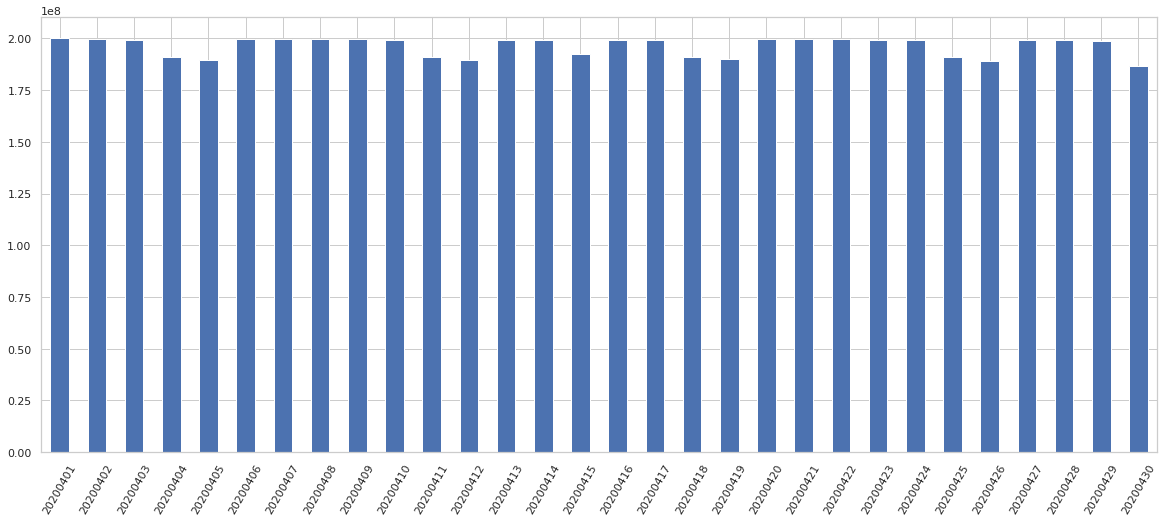

In [158]:
sns.set_theme( style = 'whitegrid' )

ax = date_s.plot( kind = 'bar', figsize = ( 20, 8 ) )
ax.set_xticklabels( date_s.index, rotation = 60 )

plt.show()

### 2004년 4월 성별 유동인구수

In [51]:
gender_s = func_aggregate( gender_list, df.성별 )

for gender in gender_list:
    print( f'[ {gender} ] 총 유동인구는 : {gender_s[ gender ]:8d}명'  )

[ 남성 ] 총 유동인구는 : 2851648900명
[ 여성 ] 총 유동인구는 : 3038188640명


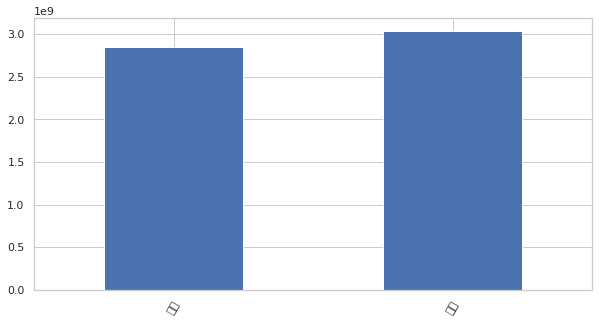

In [53]:
sns.set_theme( style = 'whitegrid' )

ax = gender_s.plot( kind = 'bar', figsize = ( 10, 5 ) )
ax.set_xticklabels( gender_s.index, rotation = 60 )

plt.show()

### 2004년 4월 연령별 유동인구수

In [54]:
age_s = func_aggregate( age_list, df.연령대 )

for age in age_list:
    print( f'[ {age} ] 총 유동인구는 : {age_s[ age ]:8d}명' )

[ 20 ] 총 유동인구는 : 1089342970명
[ 30 ] 총 유동인구는 : 1211368990명
[ 50 ] 총 유동인구는 : 1124325220명
[ 40 ] 총 유동인구는 : 1204134560명
[ 70 ] 총 유동인구는 : 542005390명
[ 60 ] 총 유동인구는 : 718660410명


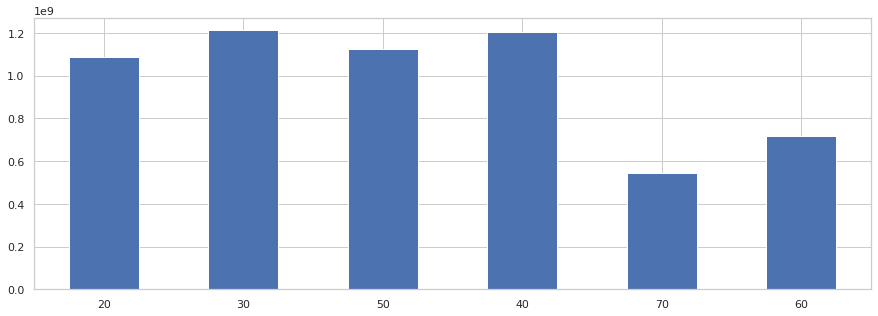

In [56]:
sns.set_theme( style = 'whitegrid' )

ax = age_s.plot( kind = 'bar', figsize = ( 15, 5 ) )
ax.set_xticklabels( age_s.index, rotation = 0 )

plt.show()

### 2004년 4월 가장 유동인구가 많은 연령대

In [57]:
age_max = age_s.idxmax()
print( f'[ {age_max}대 ] 총 유동인구는 : {age_s[ age_max ]:8d}명' )

[ 30대 ] 총 유동인구는 : 1211368990명


### 2004년 4월 가장 유동인구가 적은 연령대

In [58]:
age_min = age_s.idxmin()
print( f'[ {age_min}대 ] 총 유동인구는 : {age_s[ age_min ]:8d}명' )

[ 70대 ] 총 유동인구는 : 542005390명


### 2004년 4월 시간대별 유동인구수

In [59]:
time_s = func_aggregate( time_list, df.단위시간 )

for time in time_list:
    print( f'[ {time} 시간대 ] 총 유동인구는 : {time_s[ time ]:8d}명' )

[ 0 시간대 ] 총 유동인구는 : 242193630명
[ 1 시간대 ] 총 유동인구는 : 241777860명
[ 2 시간대 ] 총 유동인구는 : 241293460명
[ 3 시간대 ] 총 유동인구는 : 240629800명
[ 4 시간대 ] 총 유동인구는 : 240087530명
[ 5 시간대 ] 총 유동인구는 : 239669270명
[ 6 시간대 ] 총 유동인구는 : 240212130명
[ 7 시간대 ] 총 유동인구는 : 243316690명
[ 8 시간대 ] 총 유동인구는 : 247004130명
[ 9 시간대 ] 총 유동인구는 : 248900070명
[ 10 시간대 ] 총 유동인구는 : 249127080명
[ 11 시간대 ] 총 유동인구는 : 248619210명
[ 12 시간대 ] 총 유동인구는 : 248505400명
[ 13 시간대 ] 총 유동인구는 : 248750400명
[ 14 시간대 ] 총 유동인구는 : 249091620명
[ 15 시간대 ] 총 유동인구는 : 249459470명
[ 16 시간대 ] 총 유동인구는 : 249842610명
[ 17 시간대 ] 총 유동인구는 : 249994940명
[ 18 시간대 ] 총 유동인구는 : 248587220명
[ 19 시간대 ] 총 유동인구는 : 246613060명
[ 20 시간대 ] 총 유동인구는 : 245624290명
[ 21 시간대 ] 총 유동인구는 : 244744910명
[ 22 시간대 ] 총 유동인구는 : 243447240명
[ 23 시간대 ] 총 유동인구는 : 242345520명


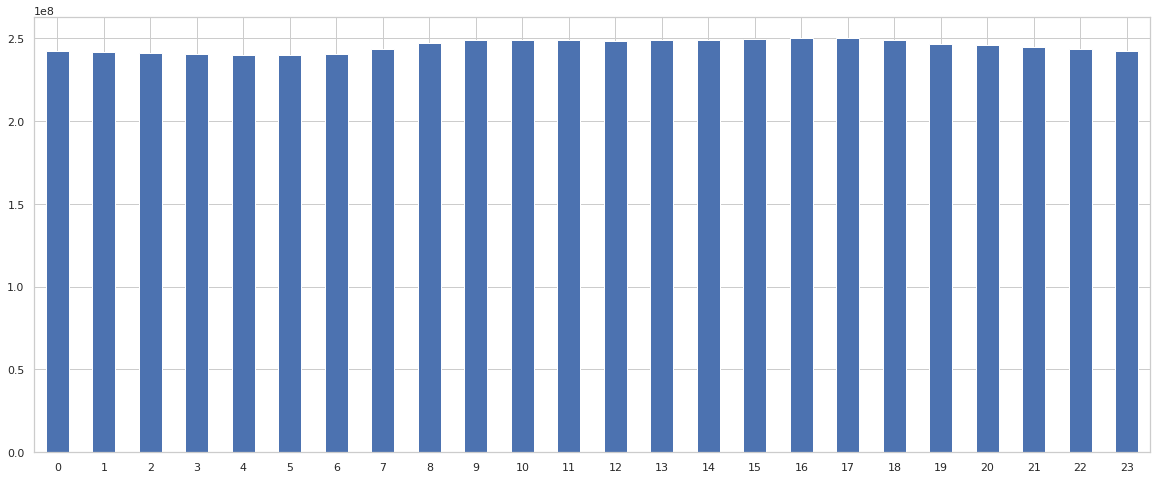

In [61]:
sns.set_theme( style = 'whitegrid' )

ax = time_s.plot( kind = 'bar', figsize = ( 20, 8 ) )
ax.set_xticklabels( time_s.index, rotation = 0 )

plt.show()

### 2004년 4월 가장 유동인구가 많은 시간대

In [62]:
time_max = time_s.idxmax()
print( f'[ {time_max} 시간대 ] 총 유동인구는 : {time_s[ time_max]:8d}명' )

[ 17 시간대 ] 총 유동인구는 : 249994940명


### 2004년 4월 가장 유동인구가 적은 시간대

In [63]:
time_min = time_s.idxmin()
print( f'[ {time_min} 시간대 ] 총 유동인구는 : {time_s[ time_min ]:8d}명' )

[ 5 시간대 ] 총 유동인구는 : 239669270명


### 2004년 4월 구별 유동인구수

In [64]:
gu_s = func_aggregate( gu_list, df.구 )

for gu in gu_list:
    print( f'[ {str.rstrip( gu ):5s} ] 총 유동인구는 : {gu_s[ gu ]:8d}명' )

[ 도봉구   ] 총 유동인구는 : 172730720명
[ 동대문구  ] 총 유동인구는 : 209673270명
[ 구로구   ] 총 유동인구는 : 252685600명
[ 강남구   ] 총 유동인구는 : 415479300명
[ 성동구   ] 총 유동인구는 : 184605390명
[ 강서구   ] 총 유동인구는 : 316538320명
[ 금천구   ] 총 유동인구는 : 162236340명
[ 관악구   ] 총 유동인구는 : 285422490명
[ 중랑구   ] 총 유동인구는 : 210660150명
[ 강북구   ] 총 유동인구는 : 171437740명
[ 종로구   ] 총 유동인구는 : 152183320명
[ 영등포구  ] 총 유동인구는 : 280428050명
[ 용산구   ] 총 유동인구는 : 151474540명
[ 광진구   ] 총 유동인구는 : 205584150명
[ 노원구   ] 총 유동인구는 : 286372000명
[ 양천구   ] 총 유동인구는 : 235960940명
[ 중구    ] 총 유동인구는 : 152646440명
[ 마포구   ] 총 유동인구는 : 245660870명
[ 동작구   ] 총 유동인구는 : 224537120명
[ 서대문구  ] 총 유동인구는 : 182865220명
[ 송파구   ] 총 유동인구는 : 372279240명
[ 은평구   ] 총 유동인구는 : 241684780명
[ 강동구   ] 총 유동인구는 : 239157350명
[ 서초구   ] 총 유동인구는 : 293867470명
[ 성북구   ] 총 유동인구는 : 243666730명


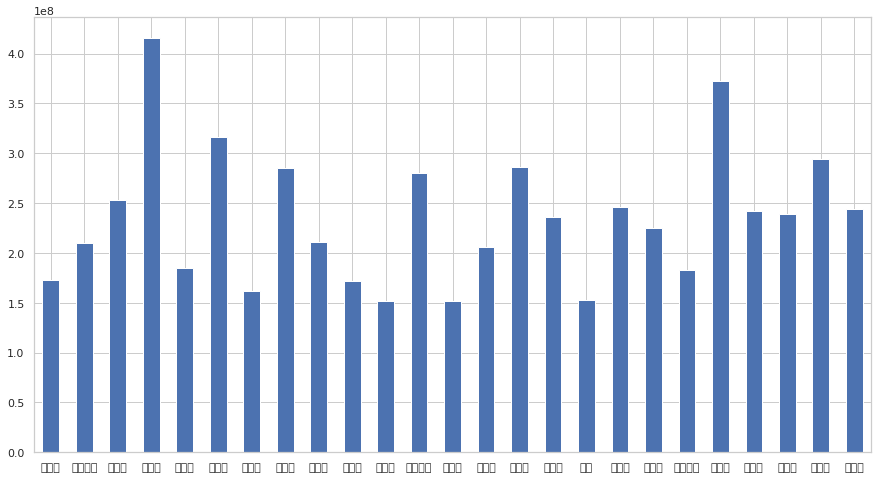

In [66]:
sns.set_theme( style = 'whitegrid' )

ax = gu_s.plot( kind = 'bar', figsize = ( 15, 8 ) )
ax.set_xticklabels( gu_s.index, rotation = 0 )

plt.show()

### 2004년 4월 가장 유동인구가 많은 구

In [67]:
gu_max = gu_s.idxmax()
print( f'[ {gu_max:5s} ] 총 유동인구는 : {gu_s[ gu_max ]:8d}명' )

[ 강남구   ] 총 유동인구는 : 415479300명


### 2004년 4월 가장 유동인구가 적은 구

In [68]:
gu_min = gu_s.idxmin()
print( f'[ {gu_min:5s} ] 총 유동인구는 : {gu_s[ gu_min ]:8d}명' )

[ 용산구   ] 총 유동인구는 : 151474540명


### 2004년 4월 일자별 남녀 평균 유동인구

In [87]:
pdf = pd.pivot_table( df,
                      index = '일자',
                      columns = '성별',
                      values = '유동인구수',
                      aggfunc = [ 'mean' ] )
pdf

mean              
성별              남성          여성
일자                                
20200401  26900.636111  28712.836111
20200402  26838.577778  28658.977778
20200403  26782.972222  28532.783333
20200404  25776.711111  27323.583333
20200405  25634.172222  27059.250000
20200406  26933.436111  28599.794444
20200407  26828.638889  28672.405556
20200408  26789.225000  28670.527778
20200409  26782.125000  28646.061111
20200410  26751.172222  28551.905556
20200411  25741.205556  27323.241667
20200412  25623.016667  27055.750000
20200413  26823.697222  28521.261111
20200414  26772.969444  28582.227778
20200415  25830.427778  27608.883333
20200416  26740.013889  28554.408333
20200417  26825.030556  28565.711111
20200418  25707.216667  27312.816667
20200419  25650.372222  27114.030556
20200420  26872.186111  28580.338889
20200421  26756.016667  28655.058333
20200422  26744.088889  28676.133333
20200423  26722.702778  28657.883333
20200424  26726.650000  28590.000000
20200425  25726.825000  27391.913889
20200426  25510.430556  27033.755556
20200427  26782.969444  28549.447222
20200428  26689.616667  28610.541667
20200429  26655.030556  28483.833333
20200430  25206.561111  26645.927778

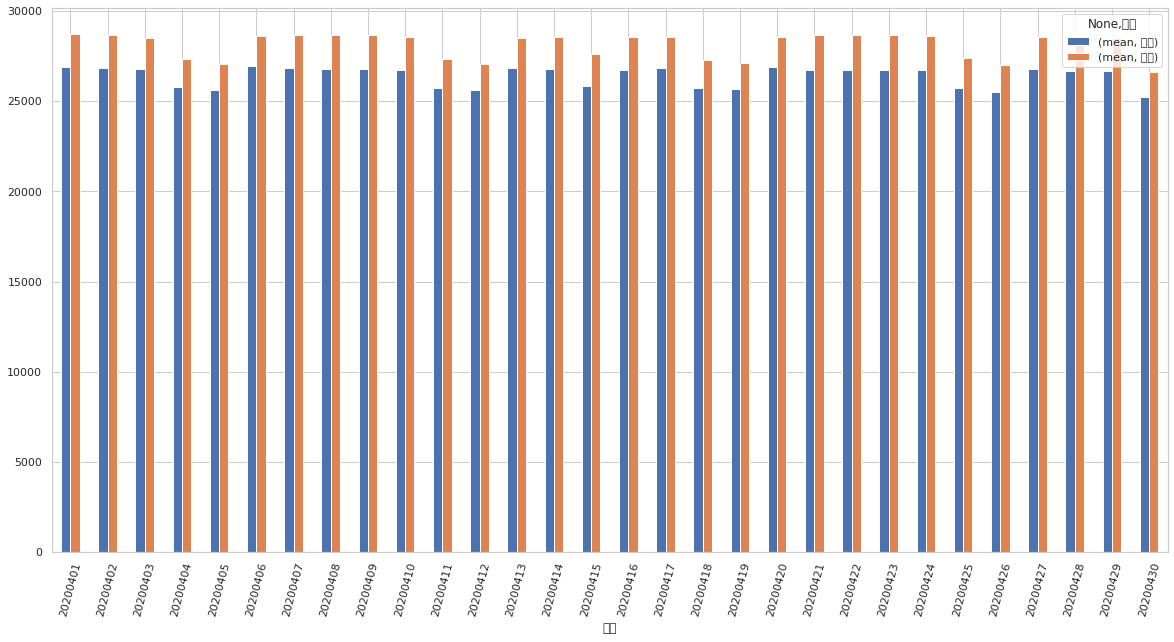

In [88]:
sns.set_theme( style = 'whitegrid' )

ax = pdf.plot( kind = 'bar', figsize = ( 20, 10 ) )
ax.set_xticklabels( pdf.index, rotation = 75 )

plt.show()

### 2004년 4월 일자별 시간대 평균 유동인구

In [89]:
pdf = pd.pivot_table( df,
                      index = '일자',
                      columns = '단위시간',
                      values = '유동인구수',
                      aggfunc = [ 'mean' ] )
pdf

mean                                            \
단위시간             0             1             2             3   
일자                                                               
20200401  27145.333333  27098.533333  27046.966667  26976.500000   
20200402  27102.800000  27056.000000  27005.900000  26933.800000   
20200403  27076.833333  27031.566667  26979.400000  26905.066667   
20200404  26947.300000  26886.366667  26828.200000  26747.800000   
20200405  26523.866667  26487.233333  26432.200000  26360.066667   
20200406  27007.266667  26979.166667  26933.766667  26869.666667   
20200407  27068.366667  27028.866667  26974.066667  26902.933333   
20200408  27049.366667  27006.833333  26952.866667  26881.366667   
20200409  27039.033333  26995.733333  26944.566667  26873.600000   
20200410  27029.200000  26986.466667  26933.500000  26861.600000   
20200411  26889.966667  26832.033333  26772.066667  26696.733333   
20200412  26466.766667  26423.466667  26373.133333  26303.200000   
20200413  26932.533333  26900.600000  26854.233333  26788.166667   
20200414  26963.800000  26919.366667  26868.733333  26792.866667   
20200415  27007.233333  26939.433333  26876.133333  26794.466667   
20200416  26939.266667  26908.633333  26862.600000  26798.433333   
20200417  26973.433333  26929.200000  26878.366667  26805.900000   
20200418  26889.300000  26828.466667  26769.466667  26692.100000   
20200419  26461.100000  26418.300000  26366.366667  26294.766667   
20200420  26935.466667  26902.000000  26860.000000  26795.000000   
20200421  26986.100000  26941.066667  26889.533333  26816.033333   
20200422  26971.900000  26926.666667  26874.800000  26799.566667   
20200423  26977.633333  26929.966667  26875.133333  26798.733333   
20200424  26974.100000  26929.633333  26875.666667  26799.466667   
20200425  26906.766667  26840.566667  26773.566667  26688.900000   
20200426  26454.266667  26411.333333  26357.933333  26279.233333   
20200427  26869.733333  26839.066667  26791.700000  26725.400000   
20200428  26909.666667  26864.666667  26808.633333  26732.333333   
20200429  26898.066667  26845.066667  26786.900000  26709.833333   
20200430  26915.633333  26839.900000  26765.133333  26675.800000   

                                                                  \
단위시간             4             5             6             7   
일자                                                               
20200401  26917.266667  26895.466667  27022.633333  27556.366667   
20200402  26876.766667  26849.866667  26974.100000  27506.233333   
20200403  26852.600000  26822.900000  26927.733333  27432.800000   
20200404  26675.200000  26586.066667  26487.700000  26433.600000   
20200405  26288.333333  26202.700000  26117.200000  26062.266667   
20200406  26822.500000  26805.233333  26963.800000  27514.533333   
20200407  26841.500000  26820.633333  26961.800000  27514.433333   
20200408  26827.966667  26803.700000  26942.966667  27496.633333   
20200409  26819.766667  26792.200000  26919.100000  27472.400000   
20200410  26811.766667  26792.366667  26910.800000  27447.933333   
20200411  26630.500000  26551.400000  26455.300000  26413.233333   
20200412  26230.066667  26143.000000  26068.533333  26034.466667   
20200413  26735.133333  26711.266667  26866.133333  27406.600000   
20200414  26734.600000  26707.900000  26846.066667  27395.133333   
20200415  26726.900000  26643.800000  26573.433333  26521.633333   
20200416  26747.866667  26721.133333  26853.266667  27382.933333   
20200417  26756.233333  26739.166667  26874.133333  27410.566667   
20200418  26621.900000  26535.400000  26438.166667  26390.166667   
20200419  26224.733333  26132.800000  26050.433333  26006.600000   
20200420  26750.133333  26733.733333  26890.433333  27449.433333   
20200421  26755.533333  26728.333333  26884.166667  27454.600000   
20200422  26747.233333  26726.500000  26876.100000  27440.566667   
20200423  26743.666667  26714.033333  26854.000000  27421.866667   
20200424  26743.6

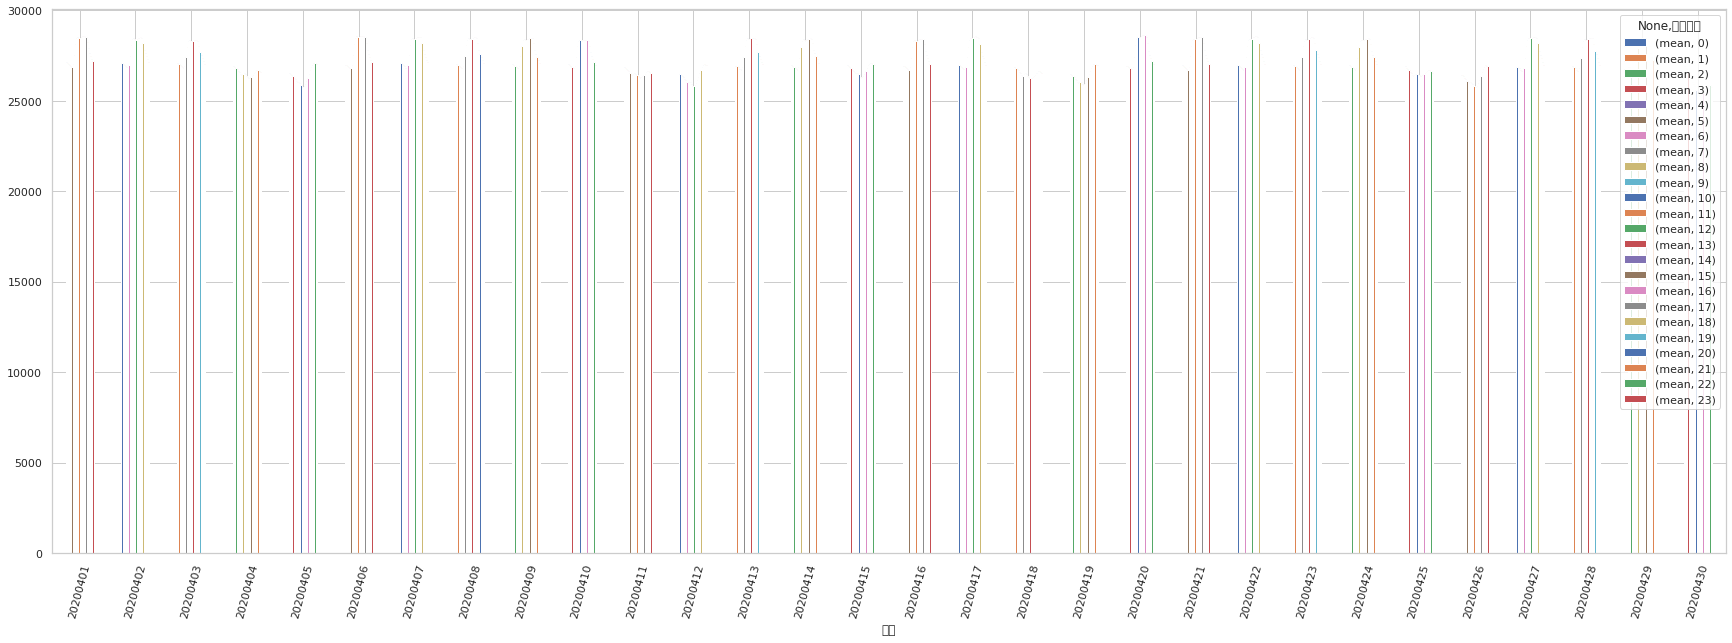

In [94]:
sns.set_theme( style = 'whitegrid' )

ax = pdf.plot( kind = 'bar', figsize = ( 30, 10 ) )
ax.set_xticklabels( pdf.index, rotation = 75 )

plt.show()